# The Residue Theorem in Complex Analysis

## Introduction

The **Residue Theorem** is one of the most powerful tools in complex analysis, providing an elegant method for evaluating contour integrals around isolated singularities. It connects the global property of a contour integral to local information about the singularities enclosed by the contour.

## Theoretical Foundation

### Laurent Series and Residues

If $f(z)$ has an isolated singularity at $z = z_0$, it can be expanded in a **Laurent series**:

$$f(z) = \sum_{n=-\infty}^{\infty} a_n (z - z_0)^n = \cdots + \frac{a_{-2}}{(z-z_0)^2} + \frac{a_{-1}}{z-z_0} + a_0 + a_1(z-z_0) + \cdots$$

The coefficient $a_{-1}$ is called the **residue** of $f$ at $z_0$, denoted:

$$\text{Res}(f, z_0) = a_{-1}$$

### The Residue Theorem

Let $f(z)$ be analytic inside and on a simple closed contour $C$, except for a finite number of isolated singularities $z_1, z_2, \ldots, z_n$ inside $C$. Then:

$$\oint_C f(z)\, dz = 2\pi i \sum_{k=1}^{n} \text{Res}(f, z_k)$$

### Computing Residues

**For a simple pole at $z_0$:**
$$\text{Res}(f, z_0) = \lim_{z \to z_0} (z - z_0) f(z)$$

**For a pole of order $m$ at $z_0$:**
$$\text{Res}(f, z_0) = \frac{1}{(m-1)!} \lim_{z \to z_0} \frac{d^{m-1}}{dz^{m-1}} \left[ (z - z_0)^m f(z) \right]$$

## Applications

The Residue Theorem is invaluable for:
- Evaluating real definite integrals
- Computing inverse Laplace transforms
- Summing infinite series
- Solving problems in physics and engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11

## Example 1: Simple Pole Residue Calculation

Consider the function:
$$f(z) = \frac{1}{z^2 + 1} = \frac{1}{(z+i)(z-i)}$$

This function has simple poles at $z = i$ and $z = -i$.

The residue at $z = i$:
$$\text{Res}(f, i) = \lim_{z \to i} (z - i) \cdot \frac{1}{(z+i)(z-i)} = \lim_{z \to i} \frac{1}{z+i} = \frac{1}{2i}$$

In [2]:
def compute_residue_simple_pole(f_without_pole, z0):
    """
    Compute residue at a simple pole z0.
    f_without_pole is (z - z0) * f(z)
    """
    return f_without_pole(z0)

# For f(z) = 1/(z^2 + 1), residue at z = i
# (z - i) * f(z) = 1/(z + i)
f_at_i = lambda z: 1 / (z + 1j)
residue_at_i = compute_residue_simple_pole(f_at_i, 1j)

# Residue at z = -i
f_at_minus_i = lambda z: 1 / (z - 1j)
residue_at_minus_i = compute_residue_simple_pole(f_at_minus_i, -1j)

print("Residue Calculations for f(z) = 1/(z² + 1)")
print("=" * 45)
print(f"Residue at z = i:  {residue_at_i}")
print(f"                 = {residue_at_i.real:.4f} + {residue_at_i.imag:.4f}i")
print(f"Residue at z = -i: {residue_at_minus_i}")
print(f"                 = {residue_at_minus_i.real:.4f} + {residue_at_minus_i.imag:.4f}i")

Residue Calculations for f(z) = 1/(z² + 1)
Residue at z = i:  -0.5j
                 = 0.0000 + -0.5000i
Residue at z = -i: (-0+0.5j)
                 = -0.0000 + 0.5000i


## Example 2: Contour Integration Using Residues

Let's evaluate the contour integral:
$$\oint_C \frac{1}{z^2 + 1}\, dz$$

where $C$ is a circle of radius 2 centered at the origin (enclosing both poles).

By the Residue Theorem:
$$\oint_C f(z)\, dz = 2\pi i \left[ \text{Res}(f, i) + \text{Res}(f, -i) \right] = 2\pi i \left[ \frac{1}{2i} - \frac{1}{2i} \right] = 0$$

In [3]:
def contour_integral_circle(f, center, radius, n_points=1000):
    """
    Numerically compute contour integral around a circle.
    """
    t = np.linspace(0, 2*np.pi, n_points)
    z = center + radius * np.exp(1j * t)
    dz = 1j * radius * np.exp(1j * t)
    
    # Trapezoidal integration
    integrand = f(z) * dz
    integral = np.trapezoid(integrand, t)
    
    return integral

# Define our function
f = lambda z: 1 / (z**2 + 1)

# Compute integral around circle of radius 2
numerical_result = contour_integral_circle(f, 0, 2)

# Theoretical result using residues
theoretical_result = 2 * np.pi * 1j * (residue_at_i + residue_at_minus_i)

print("Contour Integral of f(z) = 1/(z² + 1) around |z| = 2")
print("=" * 55)
print(f"Numerical result:    {numerical_result.real:.6f} + {numerical_result.imag:.6f}i")
print(f"Theoretical result:  {theoretical_result.real:.6f} + {theoretical_result.imag:.6f}i")
print(f"Error: {abs(numerical_result - theoretical_result):.2e}")

Contour Integral of f(z) = 1/(z² + 1) around |z| = 2
Numerical result:    0.000000 + -0.000000i
Theoretical result:  0.000000 + 0.000000i
Error: 1.11e-16


## Example 3: Evaluating a Real Integral Using Residues

One powerful application is evaluating real integrals. Consider:
$$I = \int_0^{\infty} \frac{1}{x^2 + 1}\, dx$$

Using a semicircular contour in the upper half-plane enclosing only $z = i$:
$$2I = \int_{-\infty}^{\infty} \frac{1}{x^2 + 1}\, dx = 2\pi i \cdot \text{Res}(f, i) = 2\pi i \cdot \frac{1}{2i} = \pi$$

Therefore: $I = \frac{\pi}{2}$

In [4]:
# Numerical verification
from scipy.integrate import quad

f_real = lambda x: 1 / (x**2 + 1)
numerical_integral, error = quad(f_real, 0, np.inf)
theoretical_value = np.pi / 2

print("Real Integral: ∫₀^∞ 1/(x² + 1) dx")
print("=" * 40)
print(f"Numerical result:   {numerical_integral:.10f}")
print(f"Theoretical (π/2):  {theoretical_value:.10f}")
print(f"Error: {abs(numerical_integral - theoretical_value):.2e}")

Real Integral: ∫₀^∞ 1/(x² + 1) dx
Numerical result:   1.5707963268
Theoretical (π/2):  1.5707963268
Error: 0.00e+00


## Example 4: Higher-Order Poles

Consider a function with a pole of order 2:
$$g(z) = \frac{z}{(z-1)^2}$$

The residue at the double pole $z = 1$:
$$\text{Res}(g, 1) = \lim_{z \to 1} \frac{d}{dz} \left[ (z-1)^2 \cdot \frac{z}{(z-1)^2} \right] = \lim_{z \to 1} \frac{d}{dz}[z] = 1$$

In [5]:
def numerical_derivative(f, z0, h=1e-8):
    """Compute numerical derivative using central difference."""
    return (f(z0 + h) - f(z0 - h)) / (2 * h)

def compute_residue_double_pole(f_times_pole_squared, z0):
    """Compute residue at a double pole."""
    return numerical_derivative(f_times_pole_squared, z0)

# For g(z) = z/(z-1)^2, (z-1)^2 * g(z) = z
g_simplified = lambda z: z
residue_double = compute_residue_double_pole(g_simplified, 1)

print("Residue Calculation for g(z) = z/(z-1)²")
print("=" * 45)
print(f"Residue at z = 1 (double pole): {residue_double.real:.6f}")

# Verify with contour integral
g = lambda z: z / (z - 1)**2
numerical_contour = contour_integral_circle(g, 1, 0.5)
theoretical_contour = 2 * np.pi * 1j * 1  # Residue is 1

print(f"\nContour integral verification around z = 1:")
print(f"Numerical:   {numerical_contour.real:.6f} + {numerical_contour.imag:.6f}i")
print(f"Theoretical: {theoretical_contour.real:.6f} + {theoretical_contour.imag:.6f}i")

Residue Calculation for g(z) = z/(z-1)²
Residue at z = 1 (double pole): 1.000000

Contour integral verification around z = 1:
Numerical:   0.000000 + 6.283185i
Theoretical: 0.000000 + 6.283185i


## Visualization

Let's visualize the complex function $f(z) = \frac{1}{z^2 + 1}$ and its contour integration.

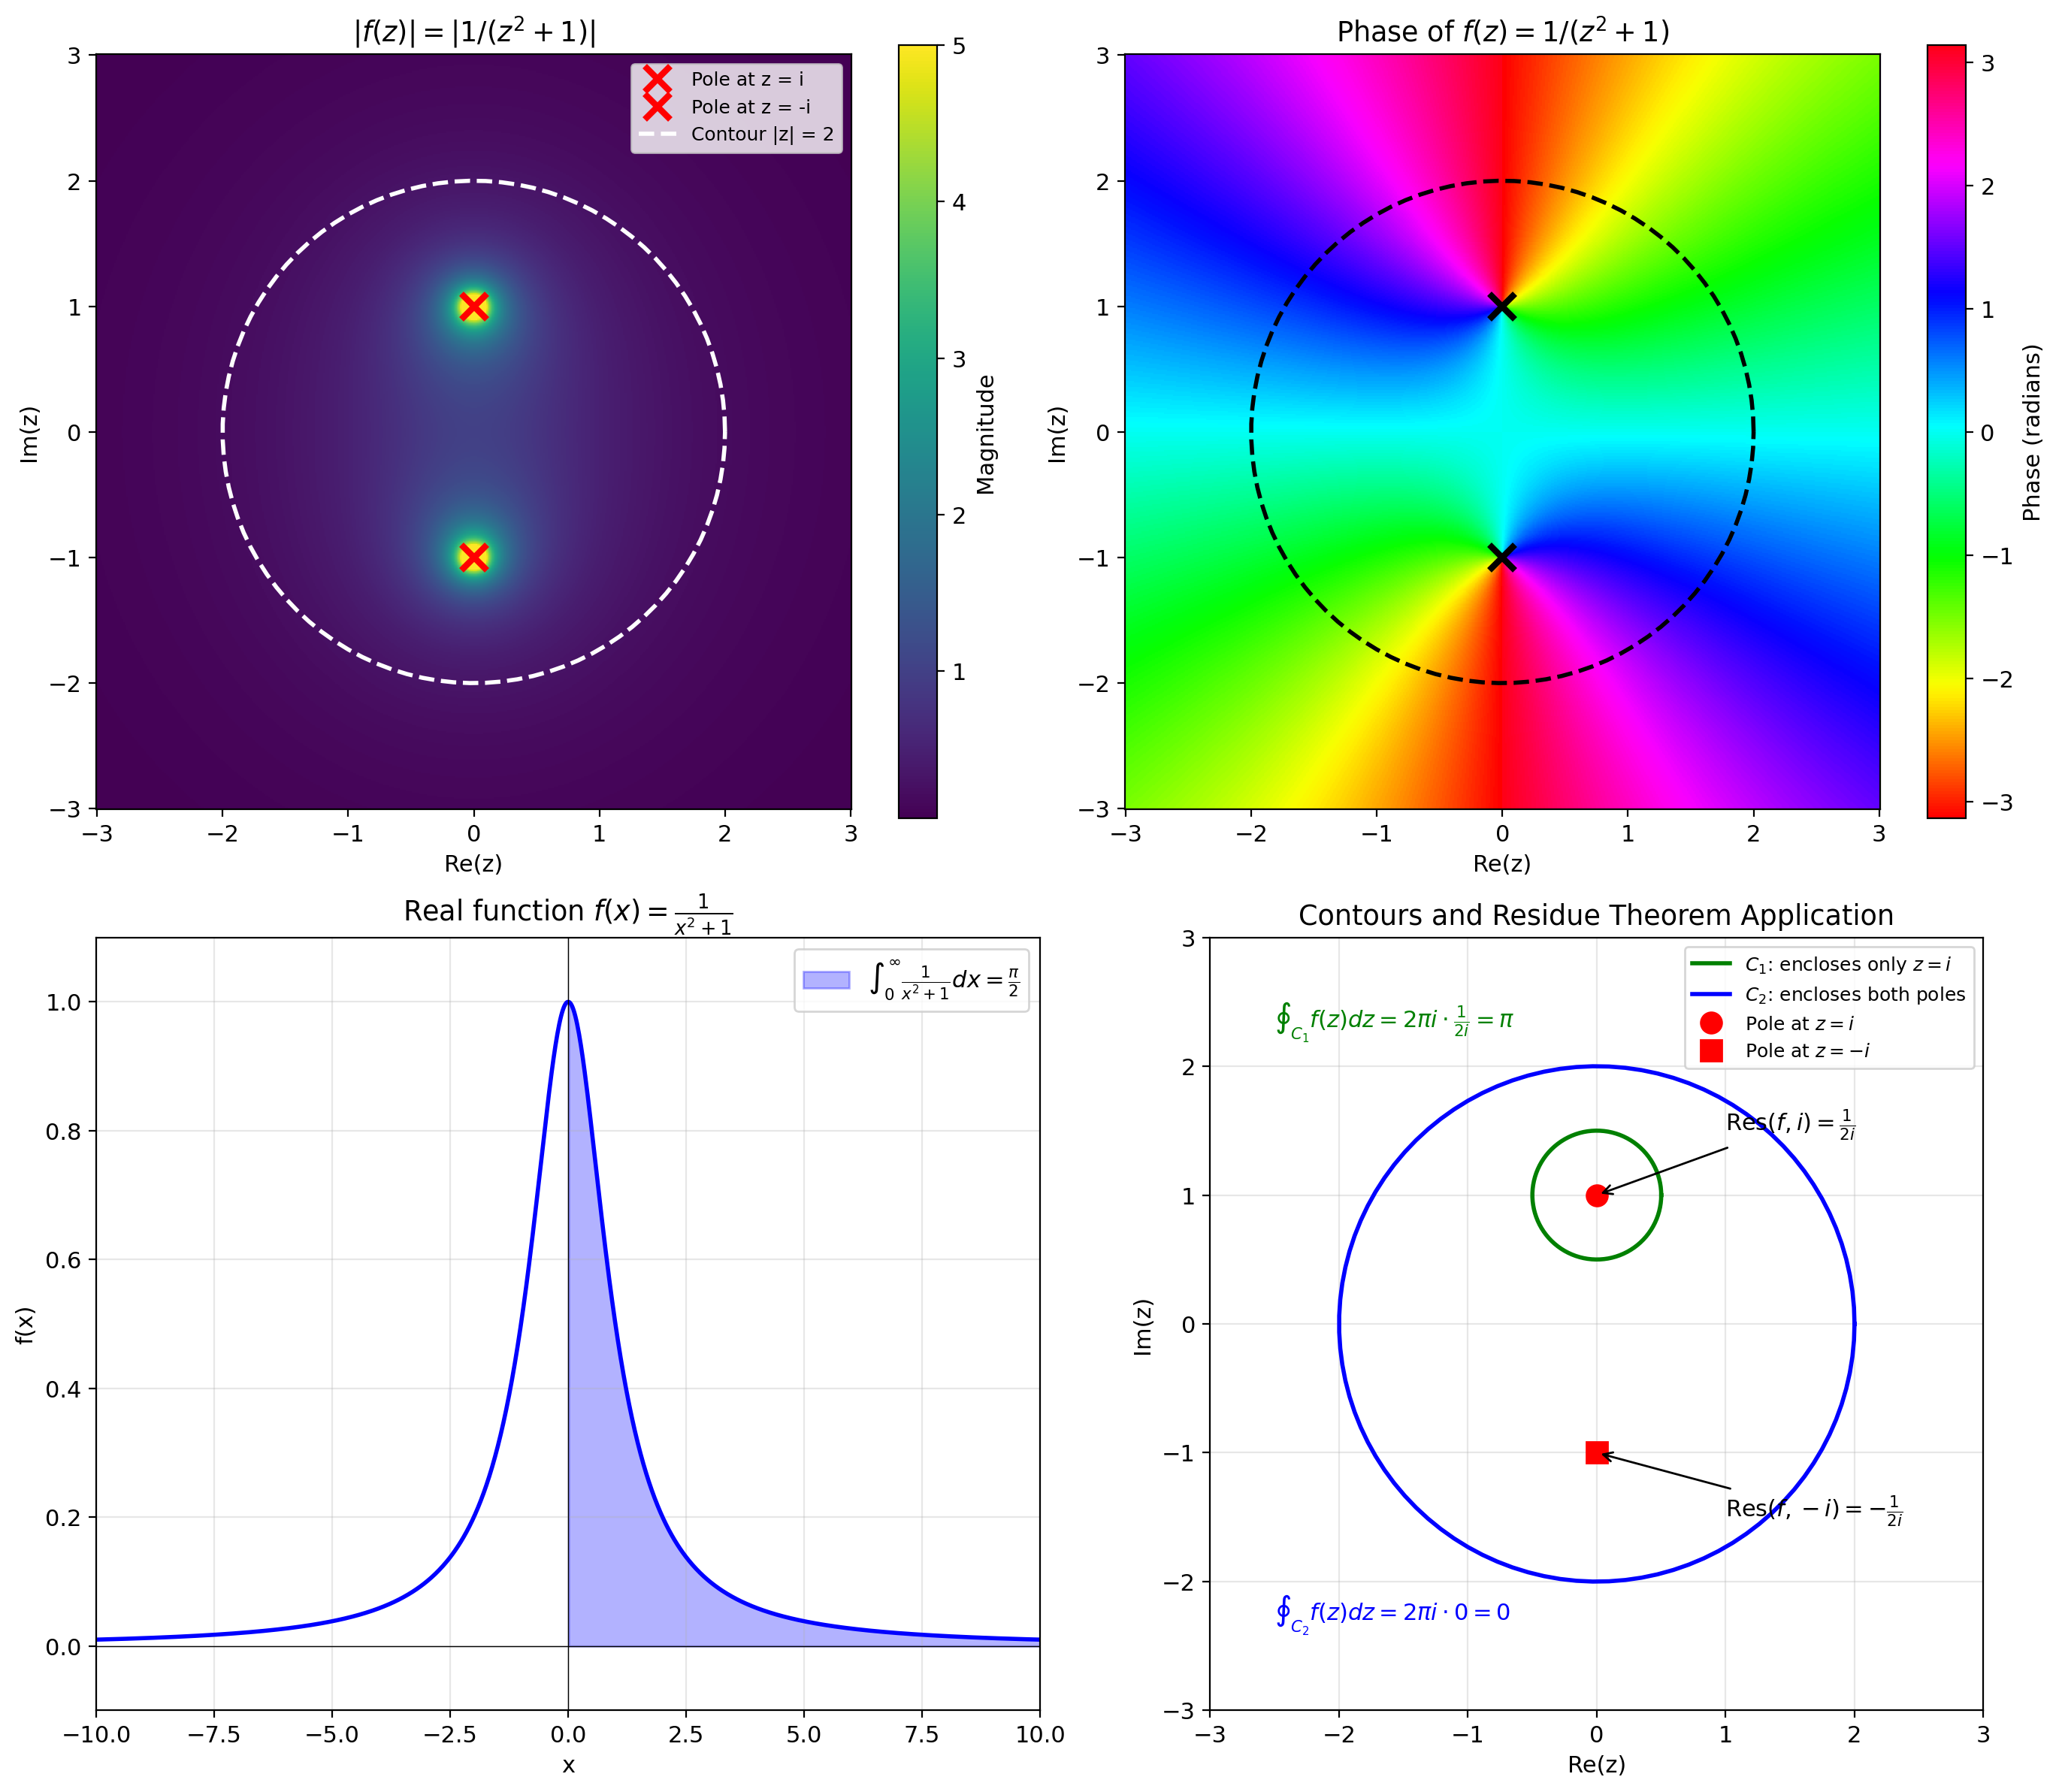


Visualization saved to 'plot.png'


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Magnitude of f(z) = 1/(z^2 + 1)
ax1 = axes[0, 0]
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Compute |f(z)| with protection against division by zero
with np.errstate(divide='ignore', invalid='ignore'):
    F = 1 / (Z**2 + 1)
    magnitude = np.abs(F)
    magnitude = np.clip(magnitude, 0, 5)  # Clip for visualization

im1 = ax1.pcolormesh(X, Y, magnitude, shading='auto', cmap='viridis')
ax1.plot(0, 1, 'rx', markersize=12, markeredgewidth=3, label='Pole at z = i')
ax1.plot(0, -1, 'rx', markersize=12, markeredgewidth=3, label='Pole at z = -i')

# Draw contour circle
theta = np.linspace(0, 2*np.pi, 100)
ax1.plot(2*np.cos(theta), 2*np.sin(theta), 'w--', linewidth=2, label='Contour |z| = 2')

ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_title(r'$|f(z)| = |1/(z^2 + 1)|$')
ax1.legend(loc='upper right', fontsize=9)
ax1.set_aspect('equal')
plt.colorbar(im1, ax=ax1, label='Magnitude')

# Plot 2: Phase of f(z)
ax2 = axes[0, 1]
with np.errstate(divide='ignore', invalid='ignore'):
    phase = np.angle(F)

im2 = ax2.pcolormesh(X, Y, phase, shading='auto', cmap='hsv')
ax2.plot(0, 1, 'kx', markersize=12, markeredgewidth=3)
ax2.plot(0, -1, 'kx', markersize=12, markeredgewidth=3)
ax2.plot(2*np.cos(theta), 2*np.sin(theta), 'k--', linewidth=2)
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.set_title(r'Phase of $f(z) = 1/(z^2 + 1)$')
ax2.set_aspect('equal')
plt.colorbar(im2, ax=ax2, label='Phase (radians)')

# Plot 3: Real integral visualization
ax3 = axes[1, 0]
x_real = np.linspace(-10, 10, 1000)
y_real = 1 / (x_real**2 + 1)

ax3.fill_between(x_real[x_real >= 0], 0, y_real[x_real >= 0], alpha=0.3, color='blue',
                  label=r'$\int_0^\infty \frac{1}{x^2+1}dx = \frac{\pi}{2}$')
ax3.plot(x_real, y_real, 'b-', linewidth=2)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')
ax3.set_title(r'Real function $f(x) = \frac{1}{x^2 + 1}$')
ax3.legend(fontsize=11)
ax3.set_xlim(-10, 10)
ax3.set_ylim(-0.1, 1.1)
ax3.grid(True, alpha=0.3)

# Plot 4: Contour and residue contributions
ax4 = axes[1, 1]

# Draw different contours and their enclosed poles
# Small circle around z = i only
theta_small = np.linspace(0, 2*np.pi, 100)
r_small = 0.5
ax4.plot(r_small*np.cos(theta_small), 1 + r_small*np.sin(theta_small), 
         'g-', linewidth=2, label=r'$C_1$: encloses only $z=i$')

# Large circle enclosing both
ax4.plot(2*np.cos(theta), 2*np.sin(theta), 
         'b-', linewidth=2, label=r'$C_2$: encloses both poles')

# Mark poles
ax4.plot(0, 1, 'ro', markersize=10, label=r'Pole at $z=i$')
ax4.plot(0, -1, 'rs', markersize=10, label=r'Pole at $z=-i$')

# Add annotations for residue values
ax4.annotate(r'Res$(f, i) = \frac{1}{2i}$', xy=(0, 1), xytext=(1, 1.5),
             fontsize=11, arrowprops=dict(arrowstyle='->', color='black'))
ax4.annotate(r'Res$(f, -i) = -\frac{1}{2i}$', xy=(0, -1), xytext=(1, -1.5),
             fontsize=11, arrowprops=dict(arrowstyle='->', color='black'))

# Add contour integral values
ax4.text(-2.5, 2.3, r'$\oint_{C_1} f(z)dz = 2\pi i \cdot \frac{1}{2i} = \pi$', 
         fontsize=11, color='green')
ax4.text(-2.5, -2.3, r'$\oint_{C_2} f(z)dz = 2\pi i \cdot 0 = 0$', 
         fontsize=11, color='blue')

ax4.set_xlabel('Re(z)')
ax4.set_ylabel('Im(z)')
ax4.set_title('Contours and Residue Theorem Application')
ax4.legend(loc='upper right', fontsize=9)
ax4.set_xlim(-3, 3)
ax4.set_ylim(-3, 3)
ax4.set_aspect('equal')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residue_theorem_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Summary

The Residue Theorem provides:

1. **Elegant evaluation** of complex contour integrals by reducing them to a sum of local contributions (residues)

2. **Powerful techniques** for computing real integrals that would be difficult or impossible with elementary methods

3. **Deep connections** between local behavior (residues at poles) and global properties (contour integrals)

Key formulas:
- **Residue Theorem**: $\displaystyle \oint_C f(z)\, dz = 2\pi i \sum_{k=1}^{n} \text{Res}(f, z_k)$

- **Simple pole residue**: $\displaystyle \text{Res}(f, z_0) = \lim_{z \to z_0} (z - z_0) f(z)$

- **Higher-order pole**: $\displaystyle \text{Res}(f, z_0) = \frac{1}{(m-1)!} \lim_{z \to z_0} \frac{d^{m-1}}{dz^{m-1}} \left[ (z - z_0)^m f(z) \right]$